http://localhost:8080/notebooks/git/siim-isic-melanoma-classification/working/MelEda0628A1__about_crop_dark_margins.ipynb#

In [1]:
PRFX = 'MelPrp0629A1'
PRFX_B4 = 'MelPrp0628B1'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from joblib import Parallel, delayed
import numpy as np
from pathlib import Path

import datetime
def dtnow(): return datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# copy

In [3]:
p_out = f'../output/{PRFX}'; Path(p_out).mkdir(exist_ok=True,parents=True)
p_b4 = f'../output/{PRFX_B4}'

In [4]:
ls $p_b4

ISIC_2019_Training_Input/  jpeg/                               test.csv
andrewmvd--isic-2019/      siim-isic-melanoma-classification/  train_all.csv


In [5]:
dftrn = pd.read_csv(f'{p_b4}/train_all.csv')
dftrn 

,source,im_pth,patient_id,target
0,20,../output/MelPrp0628B1/siim-isic-melanoma-clas...,IP_7279968,0.0
1,20,../output/MelPrp0628B1/siim-isic-melanoma-clas...,IP_3075186,0.0
2,20,../output/MelPrp0628B1/siim-isic-melanoma-clas...,IP_2842074,0.0
3,20,../output/MelPrp0628B1/siim-isic-melanoma-clas...,IP_6890425,0.0
4,20,../output/MelPrp0628B1/siim-isic-melanoma-clas...,IP_8723313,0.0
...,...,...,...,...
58452,19,../output/MelPrp0628B1/andrewmvd--isic-2019/IS...,BCN_0003925,0.0
58453,19,../output/MelPrp0628B1/andrewmvd--isic-2019/IS...,BCN_0001819,0.0
58454,19,../output/MelPrp0628B1/andrewmvd--isic-2019/IS...,BCN_0001085,1.0
58455,19,../output/MelPrp0628B1/andrewmvd--isic-2019/IS...,BCN_0002083,0.0


In [7]:
dftst = pd.read_csv(f'{p_b4}/test.csv')
dftst 

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0628B1/siim-isic-melanoma-clas...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0628B1/siim-isic-melanoma-clas...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0628B1/siim-isic-melanoma-clas...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0628B1/siim-isic-melanoma-clas...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0628B1/siim-isic-melanoma-clas...
...,...,...,...,...,...,...
10977,ISIC_9992485,IP_4152479,male,40.0,torso,../output/MelPrp0628B1/siim-isic-melanoma-clas...
10978,ISIC_9996992,IP_4890115,male,35.0,torso,../output/MelPrp0628B1/siim-isic-melanoma-clas...
10979,ISIC_9997917,IP_2852390,male,25.0,upper extremity,../output/MelPrp0628B1/siim-isic-melanoma-clas...
10980,ISIC_9998234,IP_8861963,male,65.0,lower extremity,../output/MelPrp0628B1/siim-isic-melanoma-clas...


In [13]:
dftrn['im_pth'] = dftrn.im_pth.apply(lambda x: x.replace(p_b4, p_out))

dftrn.head()

,source,im_pth,patient_id,target
0,20,../output/MelPrp0629A1/siim-isic-melanoma-clas...,IP_7279968,0.0
1,20,../output/MelPrp0629A1/siim-isic-melanoma-clas...,IP_3075186,0.0
2,20,../output/MelPrp0629A1/siim-isic-melanoma-clas...,IP_2842074,0.0
3,20,../output/MelPrp0629A1/siim-isic-melanoma-clas...,IP_6890425,0.0
4,20,../output/MelPrp0629A1/siim-isic-melanoma-clas...,IP_8723313,0.0


In [14]:
dftrn.to_csv(f'{p_out}/train_all.csv', index=False)

In [15]:
dftst['im_pth'] = dftst.im_pth.apply(lambda x: x.replace(p_b4, p_out))

dftst.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0629A1/siim-isic-melanoma-clas...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0629A1/siim-isic-melanoma-clas...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0629A1/siim-isic-melanoma-clas...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0629A1/siim-isic-melanoma-clas...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0629A1/siim-isic-melanoma-clas...


In [16]:
dftst.to_csv(f'{p_out}/test.csv', index=False)

In [35]:
ls $p_b4

andrewmvd--isic-2019/               test.csv
siim-isic-melanoma-classification/  train_all.csv


In [34]:
cp -r $p_b4/andrewmvd--isic-2019/ $p_b4/siim-isic-melanoma-classification $p_out

# crop

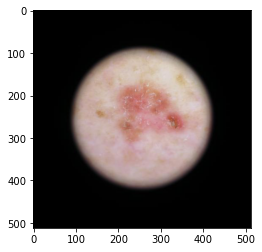

In [36]:
fnm0 = f'{p_out}/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0073022.jpg'
plt.imshow(Image.open(fnm0));

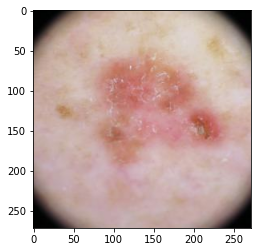

In [40]:
def crop(fnm, keep_less=0.825):
    img = cv2.imread(fnm)
    keep_less=0.80
    img_cropped = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,gray = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if not contours: return
    cnt = max(contours, key=cv2.contourArea)
    ((x, y), r) = cv2.minEnclosingCircle(cnt)
    r = r*keep_less
    if r<100: return
    x = int(x); y = int(y); r = int(r)
    img_cropped = img_cropped[0 + (y-r)*int(r<y):-1 + (y+r+1)*int(r<y),0 + (x-r)*int(r<x):-1 + (x+r+1)*int(r<x)]
    img_cropped = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB)
    return img_cropped
img_cropped = crop(fnm0)
plt.imshow(img_cropped);

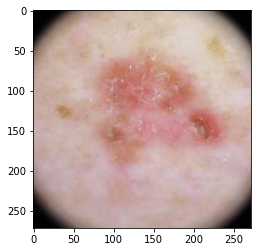

In [41]:
fnm_new = fnm1.replace(p_out, 'tmp')
Image.fromarray(img_cropped).save(fnm_new)
plt.imshow(Image.open(fnm_new));

In [42]:
def crop_and_maybe_replace(fnm):
    img_cropped = crop(fnm)
    if img_cropped is not None: 
        Image.fromarray(img_cropped).save(fnm)

## crop train

In [44]:
Parallel(n_jobs=4, verbose=10)(delayed(crop_and_maybe_replace)(fnm) for fnm in dftrn.im_pth.values)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0334s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0632s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1421s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 288 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 480 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 584 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 704 tasks      | elapsed:    4.4s
[Paralle

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## crop test

In [43]:
Parallel(n_jobs=4, verbose=10)(delayed(crop_and_maybe_replace)(fnm) for fnm in dftst.im_pth.values)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1754s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0791s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1360s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 176 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 264 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 368 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 472 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 592 tasks      | elapsed:    5.1s
[Paralle

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# inspect result

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/train/ISIC_5722813.jpg


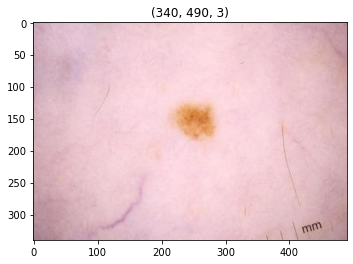

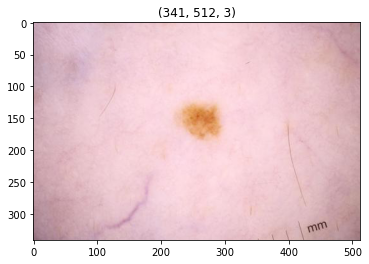

../output/MelPrp0629A1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0071457.jpg


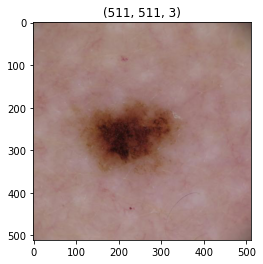

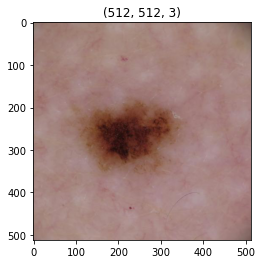

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/train/ISIC_2991680.jpg


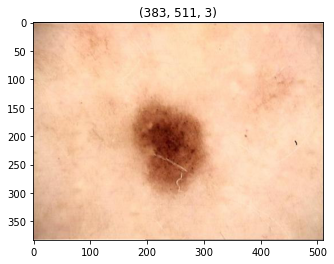

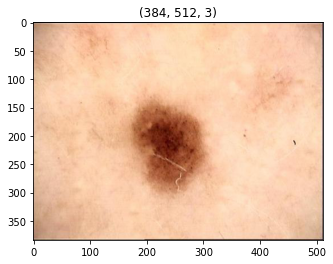

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/train/ISIC_7519274.jpg


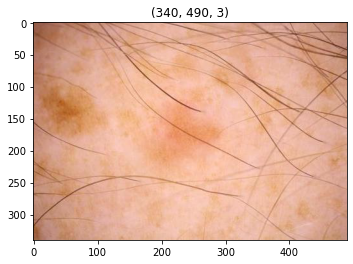

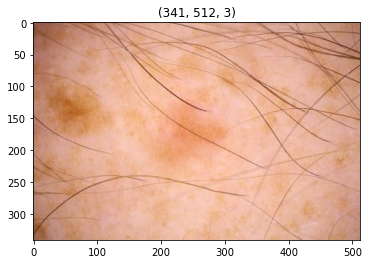

../output/MelPrp0629A1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0028323.jpg


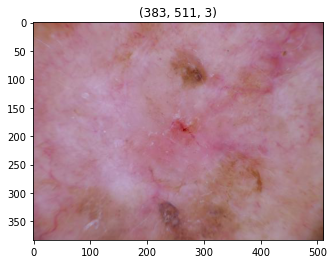

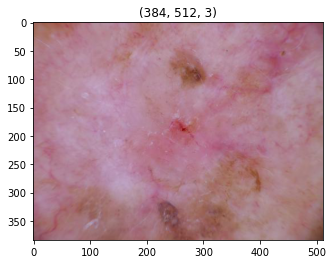

**************************************************


In [47]:
fnms = np.random.choice(dftrn.im_pth, 5, replace=False)
for fnm in fnms:
    print(fnm)
    img = plt.imread(fnm)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

    fnm_old = fnm.replace(p_out, p_b4)
    img = plt.imread(fnm_old)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

print('*'*50)

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/test/ISIC_0758024.jpg


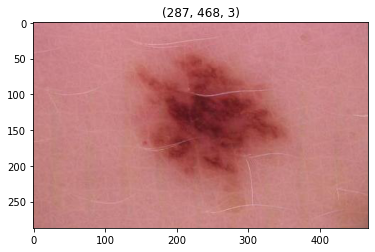

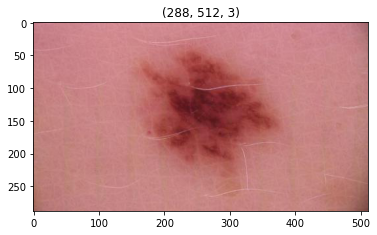

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/test/ISIC_2394570.jpg


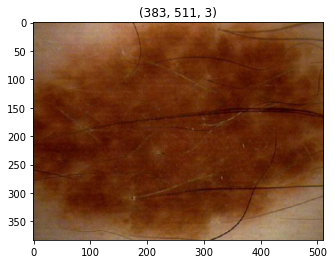

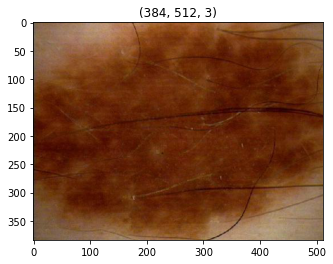

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/test/ISIC_4703709.jpg


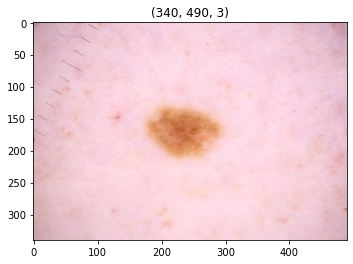

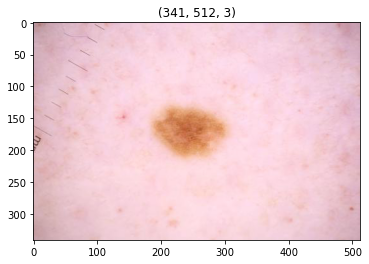

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/test/ISIC_8120614.jpg


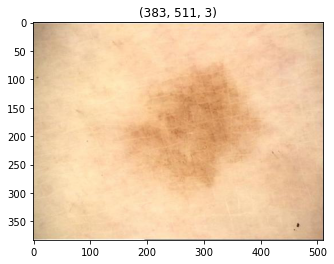

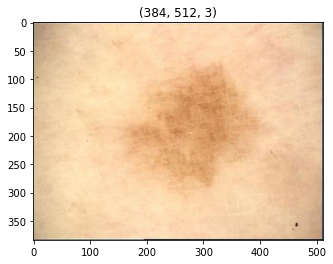

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/test/ISIC_2674316.jpg


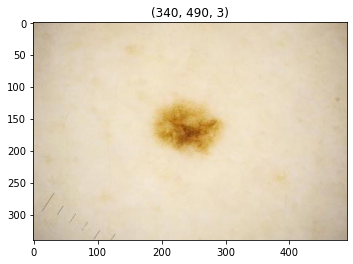

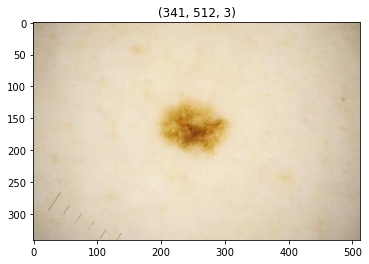

**************************************************


In [48]:
fnms = np.random.choice(dftst.im_pth, 5, replace=False)
for fnm in fnms:
    print(fnm)
    img = plt.imread(fnm)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

    fnm_old = fnm.replace(p_out, p_b4)
    img = plt.imread(fnm_old)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

print('*'*50)